In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from pandas.plotting import scatter_matrix

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score


from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression







In [5]:
df = pd.read_csv('/preliminary_task.txt',  sep="\t")

In [7]:
df.columns = ["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10","y"]

In [9]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.968379,0.716820,0.678846,0.510049,0.545299,0.573692,0.817491,0.206636,0.880111,0.574187,17
1,0.468263,0.405603,0.320325,0.468084,0.100995,0.974407,0.300062,0.608356,0.050082,0.762011,12
2,0.776820,0.103740,0.373748,0.797782,0.906810,0.599069,0.626680,0.924705,0.632768,0.512663,16
3,0.407886,0.415357,0.101543,0.935160,0.444124,0.193607,0.656837,0.599929,0.868582,0.405406,20
4,0.538797,0.088621,0.886119,0.781848,0.401623,0.207652,0.946310,0.769453,0.827292,0.937183,15


In [17]:
def draw_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [19]:
draw_missing(df).round()

,Total,Percent
x1,0,0.0
x2,0,0.0
x3,0,0.0
x4,0,0.0
x5,0,0.0
x6,0,0.0
x7,0,0.0
x8,0,0.0
x9,0,0.0
x10,0,0.0


In [20]:
df.duplicated().sum()

0

In [28]:
df[~df.apply(lambda x: x.between(x.quantile(0.05), x.quantile(0.95)))].count()


x1     100
x2     100
x3     100
x4     100
x5     100
x6     100
x7     100
x8     100
x9     100
x10    100
y       81
dtype: int64

# ***EDA***

Для выбора наиболее значимых признаков для модели можно использовать следующие характеристики: 
- среднее значение (mean) - чем больше среднее значение, тем более значимым может быть признак; 
- стандартное отклонение (std) - чем меньше стандартное отклонение, тем более значимым может быть признак; 


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,999.0,0.490827,0.293875,0.000188,0.218936,0.504846,0.738493,0.999566
x2,999.0,0.499310,0.278568,0.000085,0.262003,0.500539,0.733853,0.999959
x3,999.0,0.496888,0.297874,0.003110,0.231736,0.484541,0.765198,0.998918
x4,999.0,0.503228,0.284238,0.001223,0.268896,0.503712,0.747857,0.998785
x5,999.0,0.509042,0.283407,0.005314,0.274559,0.509213,0.742668,0.998478
x6,999.0,0.513511,0.291201,0.000517,0.255409,0.527405,0.767153,0.999059
x7,999.0,0.487020,0.288537,0.000493,0.237670,0.474573,0.739001,0.999179
x8,999.0,0.498947,0.286087,0.000408,0.256067,0.501866,0.737045,0.998646
x9,999.0,0.505185,0.282951,0.007883,0.262155,0.518658,0.748219,0.998884
x10,999.0,0.499138,0.284215,0.000170,0.249582,0.509578,0.742393,0.998819


Заметим, что mean и std примерно одинаково распределены на всех переменных.

In [16]:
fig=px.imshow(df.corr(),text_auto=True,height=800,width=800,aspect='auto')

fig.show()

 

1.   С таргетом же немножко другая ситуация, x3; x6-x10 имеют нулевую корреляцию с таргетом
2.   Видно, что переменные X нескорреллированы между собой.



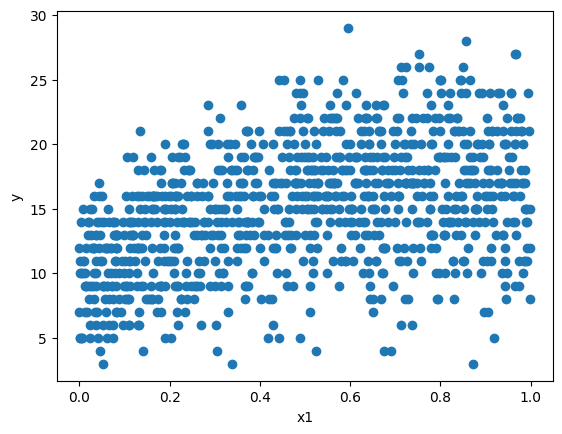

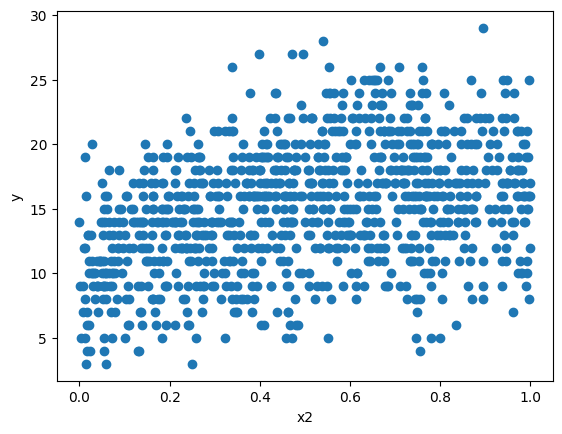

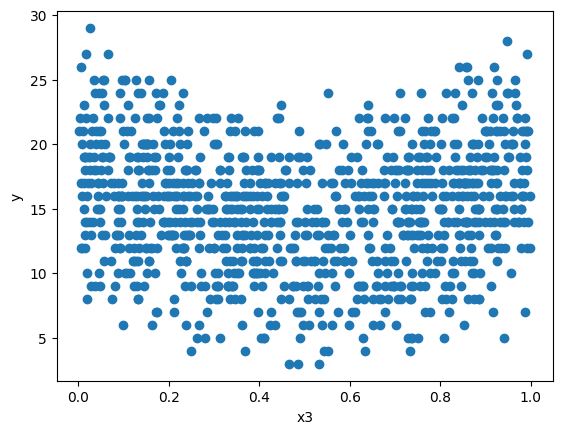

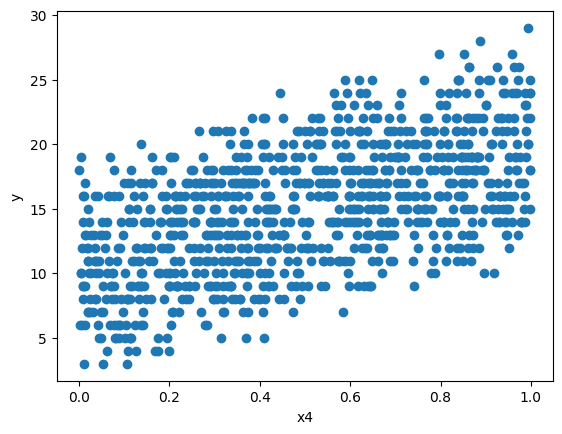

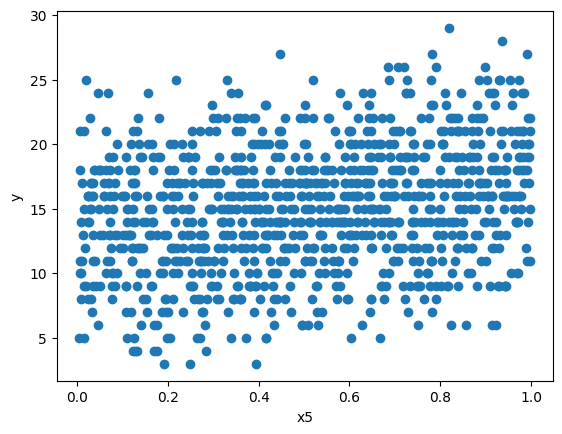

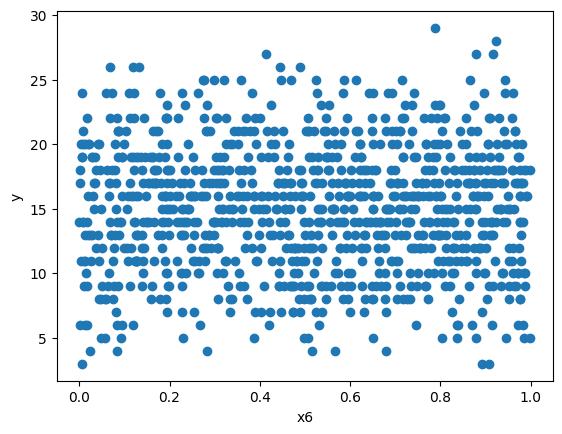

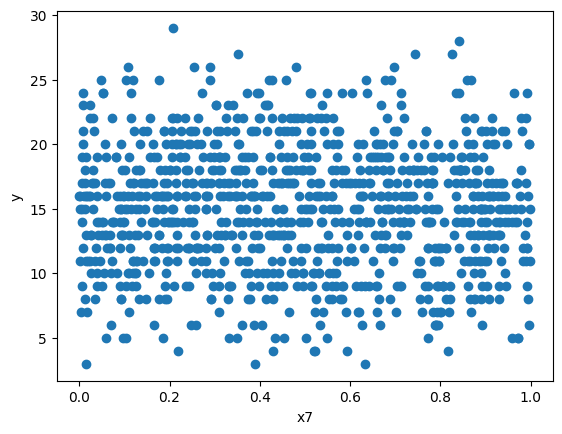

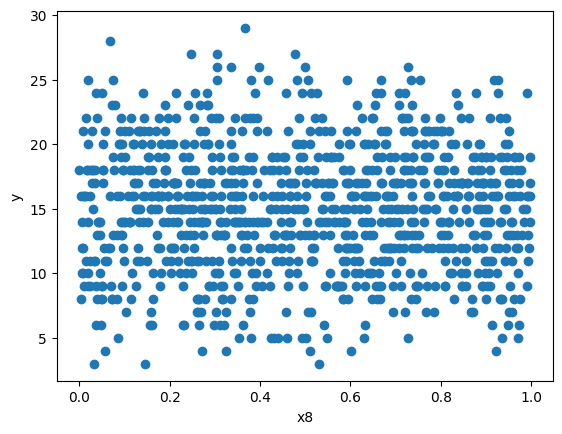

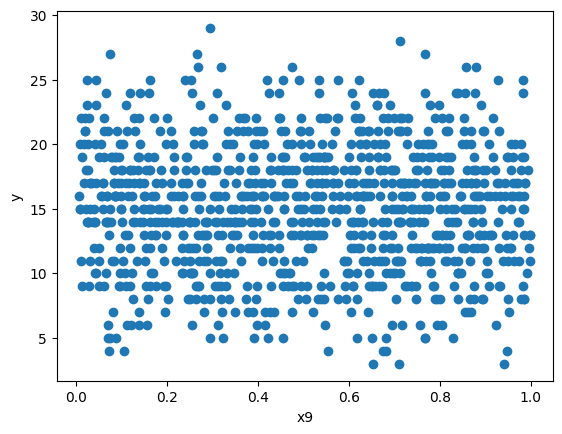

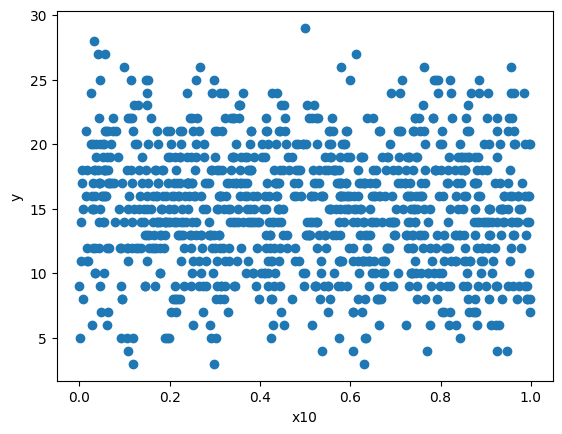

In [13]:
for col in df.columns:
    if col != 'y':
        plt.scatter(df[col], df['y'])
        plt.xlabel(col)
        plt.ylabel('y')
        plt.show()




1.   Признаки равномерно распределены от 0 до 1
2.   Видны линейные зависимости таргета от x1, x2, x4;

---
# ***Выбора критерия точности модели*** 


In [31]:
X = df.drop(['y'], axis = 1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

## ***Линейная регрессия***

In [42]:
l_model = LinearRegression()
l_model.fit(X_train_st, y_train)
l_predictions = l_model.predict(X_test_st)

print('Метрики для модели линейной регрессии:')
print('MAE: {}\nMSE: {}\nMedianAE:{}\nR2 score:{}'.format(
    mean_absolute_error(y_test, l_predictions),
    mean_squared_error(y_test, l_predictions),
    median_absolute_error(y_test, l_predictions),
    r2_score(y_test, l_predictions)

))

Метрики для модели линейной регрессии:
MAE: 2.114061184870492
MSE: 7.509195473315194
MedianAE:1.6995729195504259
R2 score:0.6834181236903154


В данном случае значения метрик **MAE и MSE** довольно высокие, что может говорить о том, что модель не очень хорошо справляется с предсказанием целевой переменной. 

Однако ***медианная абсолютная ошибка*** довольно низкая, что может указывать на то, что модель хорошо работает на большинстве данных. 

Значение **R2 score** равно 0.68, что говорит о том, что модель объясняет около 68% вариации целевой переменной, что может быть достаточно для некоторых задач.

In [45]:
features = pd.DataFrame(l_model.coef_.T, X.columns).reset_index()
features.columns = ['feature', 'coef']
features['coef'] = features['coef'].apply(lambda x: abs(x))
features = features.sort_values(by='coef', ascending=False)
print('\nКоэффициенты признаков в оптимальной функции линейной регрессии:')
print(features)


Коэффициенты признаков в оптимальной функции линейной регрессии:
  feature      coef
3      x4  2.732814
0      x1  2.126178
1      x2  1.886173
4      x5  1.417349
6      x7  0.120520
9     x10  0.068869
8      x9  0.068098
2      x3  0.035035
7      x8  0.014819
5      x6  0.002210


Наибольший вклад в объяснение зависимой переменной y вносят признаки x4, x1 и x2, так как у них наибольшие коэффициенты

---
## ***Дерево решений***

In [49]:
dt_none = DecisionTreeRegressor(max_depth=3)
dt_none.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

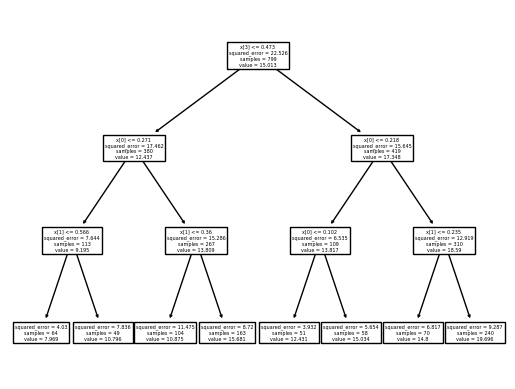

In [50]:
tree.plot_tree(dt_none);

In [52]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)
clf_predictions = clf.predict(X_test_st)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [55]:
print('Метрики для дерева решений:')
print('MAE: {}\nMSE: {}\nMedianAE:{}\nR2 score:{}'.format(
    mean_absolute_error(y_test, clf_predictions),
    mean_squared_error(y_test, clf_predictions),
    median_absolute_error(y_test, clf_predictions),
    r2_score(y_test, clf_predictions)

))

Метрики для дерева решений:
MAE: 5.705
MSE: 46.975
MedianAE:5.0
R2 score:-0.9804296868412621


In [56]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

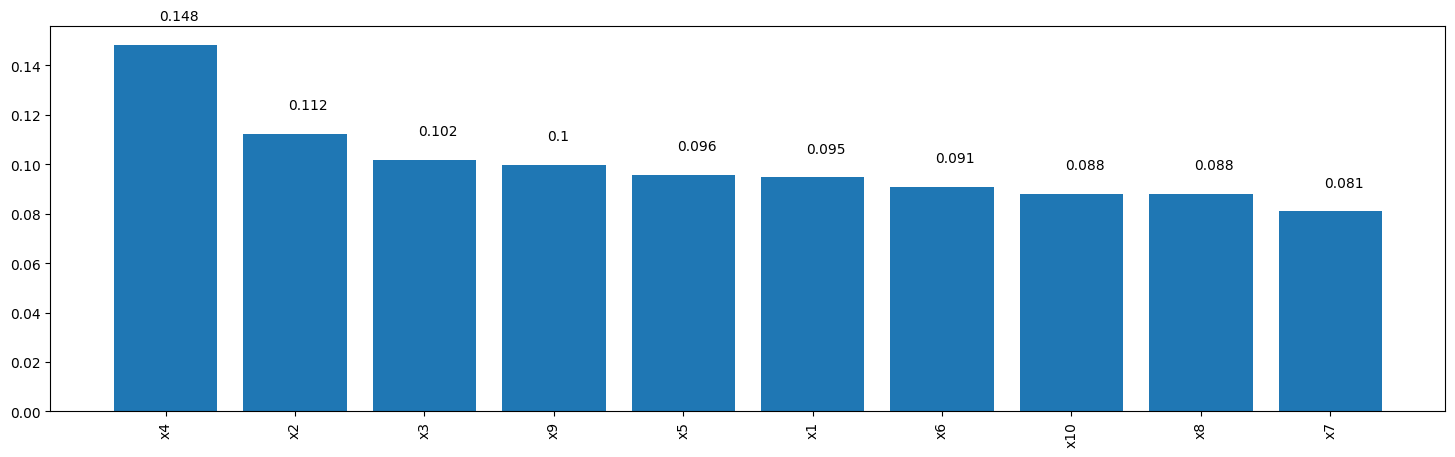

In [59]:
dt_fl, dt_fd = draw_feature_importances(clf, X_train)

Наибольший вклад в объяснение зависимой переменной y вносят признаки x4, x2 

## ***Настройка точности моделей***

In [60]:
tree = DecisionTreeClassifier()

param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

grid_search = GridSearchCV(tree, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

accuracy_tree = grid_search.best_estimator_.score(X_test,y_test)

print("Наилучшие параметры: {} ", grid_search.best_params_)
print("Оценка точности на кросс-валидации: {:.2f}".format(grid_search.best_score_))
print(accuracy_tree)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



Наилучшие параметры: {}  {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10}
Оценка точности на кросс-валидации: 0.16
0.12


In [65]:
model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1],
    'positive': [True, False]
}

grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X, y)

best_params = grid_search.best_params_

cv_score = cross_val_score(grid_search.best_estimator_, X, y, cv=5).mean()

y_pred = grid_search.best_estimator_.predict(X_test)

accuracy_LinearRegression = grid_search.best_estimator_.score(X_test,y_test)

print("Наилучшие параметры: {}".format(grid_search.best_params_))
print("Оценка точности на кросс-валидации: {:.2f}".format(grid_search.best_score_))
print(accuracy_LinearRegression)

Наилучшие параметры: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': True}
Оценка точности на кросс-валидации: 0.73
0.6871990154153869


### ***Сравните качество полученных моделей с качеством моделей***

In [73]:
models = [['DecisionTree :',DecisionTreeRegressor()],
          ['Linear Regression :', LinearRegression()]]

In [74]:
print('Вывод 1')
for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print('\n', name, '\nMAE: {}\nMSE: {}\nMedianAE:{}\nR2 score:{}'.format(
    mean_absolute_error(y_test, predictions),
    mean_squared_error(y_test, predictions),
    median_absolute_error(y_test, predictions),
    r2_score(y_test, predictions)

))


Вывод 1

 DecisionTree : 
MAE: 2.355
MSE: 8.835
MedianAE:2.0
R2 score:0.6275232297340596

 Linear Regression : 
MAE: 2.114061184870492
MSE: 7.509195473315194
MedianAE:1.699572919550424
R2 score:0.6834181236903154


In [75]:
models = [['DecisionTree :',DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 3, min_samples_split = 10)],
          ['Linear Regression :', LinearRegression(copy_X = True, fit_intercept = True, n_jobs = -1, positive =True)]]

In [76]:
print('Вывод 2')
for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print('\n', name, '\nMAE: {}\nMSE: {}\nMedianAE:{}\nR2 score:{}'.format(
    mean_absolute_error(y_test, predictions),
    mean_squared_error(y_test, predictions),
    median_absolute_error(y_test, predictions),
    r2_score(y_test, predictions)

))

Вывод 2

 DecisionTree : 
MAE: 2.1606936274509803
MSE: 7.199457682901592
MedianAE:1.8452380952380958
R2 score:0.6964764294970576

 Linear Regression : 
MAE: 2.104697588323312
MSE: 7.462877851720261
MedianAE:1.5941740436424539
R2 score:0.6853708388117734



Настройка гиперпараметров улучшила результаты модели DecisionTree и сделала ее более конкурентоспособной по сравнению с моделью Linear Regression. Однако, модель Linear Regression все еще показывает лучшие результаты по всем метрикам, что говорит о ее более точной предсказательной способности.

# ***Вывод***


1.   **Важные для модели переменные**: x1-x4 
2.   **Неважные - остальные**: x5-x10


